In [67]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

# import sys , os
# sys.path.append(os.pardir)
# import numpy as np
# from data_set.mnist import load_mnsit

# # mnist -> 손글씨 , 사진자료 

# ( x_train , t_train ), ( x_test , t_test ) = loadt_mnist( normalize = True , one_hot_label = True)


 

## 수치미분 / 편미분 / 기울기 / 중앙차분

Text(0.5, 0, 'x')

Text(0, 0.5, 'f(x)')

0.1999999999990898


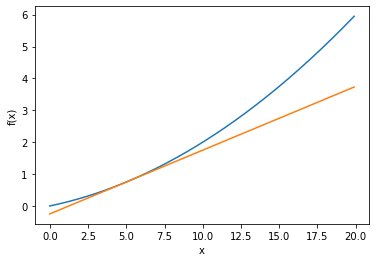

In [31]:
import numpy as np
import matplotlib.pylab as plt

def numerical_diff( f , x ): # 중앙차분 , 두개의 선의 접선의 위치 
    h = 1e-4 # 0.0001
    return ( f (x+h) - f(x-h)) / (2*h) # 한점에서의 미분값 

def function_1 (x):
    return 0.01*x**2 + 0.1*x # 미분 x

def tangent_line (f,x):     # 노란색 직선 , 
    d = numerical_diff( f , x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y 

x = np.arange(0.0,20.0,0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line( function_1 , 5) # x 가 5일떄의 접선의 그래프를 그려라
y2 = tf(x)

plt.plot(x,y)
plt.plot(x,y2)
plt.show()

## 경사하강법 구현

(-3.5, 3.5)

(-4.5, 4.5)

Text(0.5, 0, 'XO')

Text(0, 0.5, 'X1')

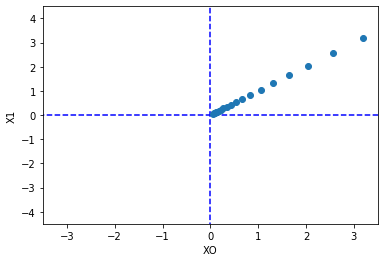

In [36]:

def _numerical_gradient_no_batch(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h 
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = ( fxh1 - fxh2 ) / (2*h)
        
        x[idx] = tmp_val
        
    return grad

def numerical_gradient( f, X ):
    if X.ndim == 1:
        return _numerical_gradient_no_batch( f, X )
    else:
        grad = np.zeros_like(X)
        
        for idx , in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f,x)
            
        return grad

def gradient_descent( f , init_x , lr=0.01 , step_num = 100):
    
    x = init_x
    x_history =[]
    
    for i in range(step_num):
        x_history.append( x.copy())
        
        grad = numerical_gradient( f , x )
        x -= lr * grad
        
    return x , np.array(x_history)

def function_2 (x):
    return x[0]**2 + x[1]**2


init_x = np.array([4.0,4.0])

lr=0.1
step_num = 20

x , x_history = gradient_descent(function_2 , init_x , lr=lr , step_num = step_num)

plt.plot( [-5,5] , [0,0] , '--b')
plt.plot( [0,0] , [-5,5] , '--b')
plt.plot(x_history[:,0] , x_history[:,1] , 'o')

plt.xlim(-3.5,3.5)
plt.ylim(-4.5,4.5)
plt.xlabel("XO")
plt.ylabel("X1")
plt.show()